# The Morris function

## Abstract

This page documents the Morris test function. It is based on the otmorris module.

## Reference

* M. D. Morris, 1991, Factorial sampling plans for preliminary computational experiments,Technometrics, 33, 161--174.
* Metamodel-Based Sensitivity Analysis: Polynomial Chaos Expansions and Gaussian Processes. Loïc Le Gratiet, Stefano Marelli, and Bruno Sudret. R. Ghanem et al. (eds.), Handbook of Uncertainty Quantification, 2015
* https://github.com/openturns/otmorris/tree/master
* http://openturns.github.io/otmorris/master/

## Description

The Morris function is a non-monotonic function of Morris from $[0,1]^{20}$ to $\mathbb{R}$.

For any $x\in[0,1]^{20}$, let

\begin{align*}
g(x) &= \beta_0 + \sum_{i=1}^{20} \beta_i w_i + \sum_{i<j}^{20} \beta_{i,j} w_i w_j \\
  & \sum_{i<j<\ell}^{20} \beta_{i,j,\ell} w_i w_j w_\ell 
   + \sum_{i<j<\ell<s}^{20} \beta_{i,j,\ell,s} w_i w_j w_\ell w_s
\end{align*}

where
$$
w_i = 2\left(x_i-\frac{1}{2}\right), \qquad i=1,2,4,6,8,...,20
$$
and 
$$
w_i = 2\left(1.1 \frac{x_i}{x_i+1}-\frac{1}{2}\right), \qquad i=3,5,7.
$$

Let $\mathcal{N}(0,1)$ be the gaussian random variable with zero mean and unit standard deviation.

The first-order coefficients are defined by:
$$
\beta_i = 
\begin{cases} 
20 &\mbox{if } 1,...,10 \\
\mathcal{N}(0,1) & \mbox{otherwise}.
\end{cases}
$$

The second-order coefficient are defined by:
$$
\beta_{i,j} =
\begin{cases} 
 -15 &\mbox{if } i,j=1,...,6 \\
\mathcal{N}(0,1) & \mbox{otherwise}.
\end{cases}
$$

The third-order coefficient are defined by:
$$
\beta_{i,j,\ell} = 
\begin{cases} 
 -10 &\mbox{if } i,j,\ell=1,...,5\\
0 & \mbox{otherwise}.
\end{cases}
$$

The fourth-order coefficient are defined by:
$$
\beta_{i,j,\ell,s} = 
\begin{cases} 
5 &\mbox{if } i,j,\ell,s=1,...,4\\
0 & \mbox{otherwise}.
\end{cases}
$$


In [1]:
import openturns as ot
import otmorris

Setting the seed allows to produce always the same Morris parameters.

In [2]:
ot.RandomGenerator.SetSeed(1)

In [3]:
alpha = ot.DistFunc.rNormal(10)
beta = ot.DistFunc.rNormal(14*6)
gamma = ot.DistFunc.rNormal(20*14)
b0 = ot.DistFunc.rNormal()

In [4]:
g = ot.Function(otmorris.MorrisFunction(alpha, beta, gamma, b0))

In [5]:
U = [ot.Uniform(0,1)]*20

In [6]:
X = ot.ComposedDistribution(U)

In [7]:
n = 500

In [8]:
sampleX = X.getSample(n)

In [9]:
sampleY = g(sampleX)

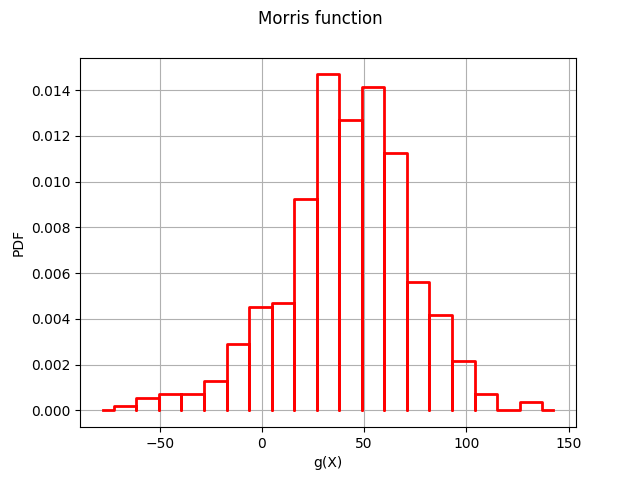

In [10]:
graph = ot.HistogramFactory().build(sampleY).drawPDF()
graph.setLegends([""])
graph.setTitle("Morris function")
graph.setXTitle("g(X)")
graph.setYTitle("PDF")
graph